In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
import pandas as pd

In [ ]:
review_data = pd.read_csv('K8 Reviews v0.2.csv').drop('sentiment',axis=1)[:200]
review_data.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


In [ ]:
review_data.shape

# We have 14K reviews

(200, 1)

In [ ]:
review_data.isnull().sum()

# Since our data has no null values will be skip this step

review    0
dtype: int64

In [ ]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [ ]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True)
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dr...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [ ]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,Good,[good]
4,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


In [ ]:
!pip install stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, need, updates, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,Good,[good]
4,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


In [ ]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."
4,Only I'm telling don't buyI'm totally disappoi...,"[telling, buyi, totally, disappointedpoor, bat..."


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [ ]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [ ]:
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary<421 unique tokens: ['improvement', 'need', 'update', 'amazon', 'backup']...>


In [ ]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(19, 1), (20, 1)]
3                  [(3, 2), (21, 1), (22, 3), (23, 1)]
4        [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]
5    [(14, 1), (22, 1), (29, 1), (30, 1), (31, 1), ...
6                           [(5, 1), (36, 1), (37, 1)]
7    [(14, 2), (22, 2), (23, 2), (34, 1), (38, 1), ...
8                 [(44, 1), (45, 1), (46, 1), (47, 1)]
9                  [(8, 1), (22, 1), (48, 1), (49, 1)]
Name: clean_review, dtype: object

In [ ]:
from IPython.display import clear_output

In [ ]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [ ]:
ldamodel.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.070*"camera" + 0.043*"quality" + 0.036*"product" + 0.026*"mobile" + 0.023*"phone" + 0.022*"sound" + 0.022*"customer" + 0.022*"issue" + 0.016*"battery" + 0.015*"speaker"'),
 (1,
  '0.106*"battery" + 0.031*"fast" + 0.031*"standby" + 0.024*"call" + 0.016*"work" + 0.016*"money" + 0.016*"mobile" + 0.016*"signal" + 0.016*"hour" + 0.016*"network"'),
 (2,
  '0.092*"phone" + 0.042*"camera" + 0.025*"problem" + 0.017*"battery" + 0.017*"fast" + 0.017*"heating" + 0.017*"product" + 0.017*"speaker" + 0.017*"day" + 0.017*"processor"'),
 (3,
  '0.068*"problem" + 0.059*"battery" + 0.051*"product" + 0.034*"lenovo" + 0.026*"slot" + 0.026*"camera" + 0.026*"phone" + 0.023*"mobile" + 0.018*"auto" + 0.018*"verigood"'),
 (4,
  '0.058*"mobile" + 0.026*"amazon" + 0.023*"problem" + 0.023*"contact" + 0.023*"bhosdi" + 0.023*"delay" + 0.019*"charger" + 0.016*"battery" + 0.016*"heating" + 0.016*"issue"'),
 (5,
  '0.035*"phone" + 0.018*"fast" + 0.018*"camera" + 0.018*"product" + 0.018*"love" + 0.018*"battery

In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())



Coherence Score:  0.3620737394707383


In [ ]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [ ]:
topic_num,cv_score = calculate_topic_cv(ldamodel,review_data['clean_review'],dictionary,15)

In [ ]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
8,0.393255
6,0.388202
13,0.378663
7,0.375595
9,0.374708
11,0.368547
12,0.362074
14,0.353131
5,0.345780


In [ ]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=review_data['clean_review'],dictionary=dictionary , coherence='c_v').get_coherence())

0.3882017943787477


In [ ]:
ldamodel.print_topics()

[(0,
  '0.049*"phone" + 0.038*"camera" + 0.027*"quality" + 0.027*"product" + 0.024*"call" + 0.020*"issue" + 0.016*"fast" + 0.016*"mobile" + 0.016*"please" + 0.016*"feature"'),
 (1,
  '0.041*"battery" + 0.041*"time" + 0.029*"lenovo" + 0.029*"work" + 0.024*"please" + 0.018*"performance" + 0.018*"bought" + 0.018*"android" + 0.018*"hour" + 0.018*"mobile"'),
 (2,
  '0.102*"phone" + 0.029*"camera" + 0.023*"problem" + 0.021*"update" + 0.017*"fast" + 0.017*"day" + 0.017*"amazon" + 0.017*"hang" + 0.014*"battery" + 0.013*"product"'),
 (3,
  '0.046*"phone" + 0.042*"battery" + 0.038*"problem" + 0.037*"product" + 0.033*"lenovo" + 0.029*"mobile" + 0.021*"camera" + 0.017*"awesome" + 0.013*"note" + 0.013*"heating"'),
 (4,
  '0.068*"battery" + 0.057*"phone" + 0.050*"mobile" + 0.031*"problem" + 0.022*"heating" + 0.018*"camera" + 0.017*"amazon" + 0.014*"fast" + 0.011*"range" + 0.011*"excellent"'),
 (5,
  '0.046*"phone" + 0.044*"lenovo" + 0.030*"product" + 0.020*"performance" + 0.019*"problem" + 0.017*"op

In [ ]:
#Creating a lookup table for topics
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
#topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})


In [ ]:
#Creating new columns and inserting topic numbers and names¶

for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num])
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)
review_data.head()


,review,clean_review,Topic_Number,Topic_Name
0,Good but need updates and improvements,"[need, update, improvement]",1,Mixed issues
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ...",1,Mixed issues
2,when I will get my 10% cash back.... its alrea...,"[cash, january]",5,Battery
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon...",2,Heating issue
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa...",2,Heating issue


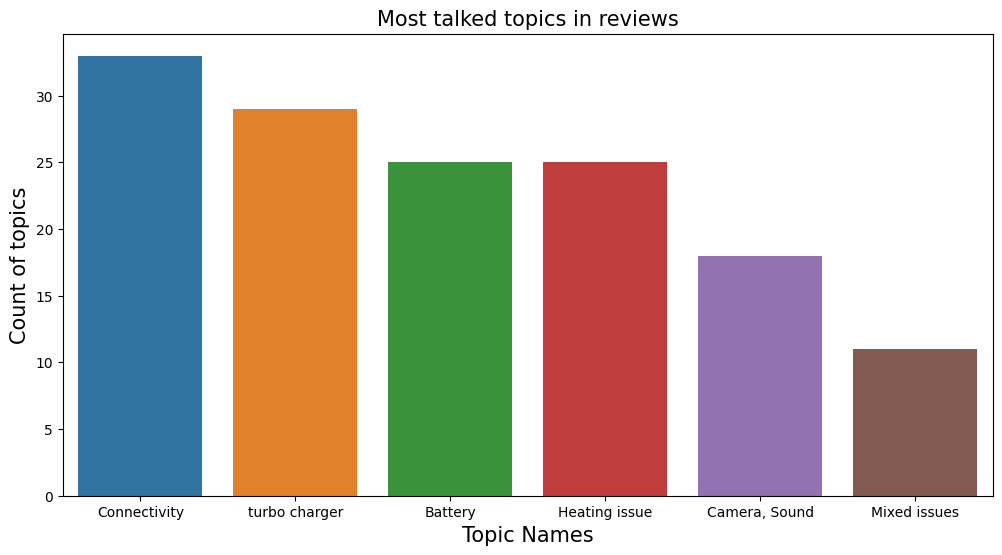

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

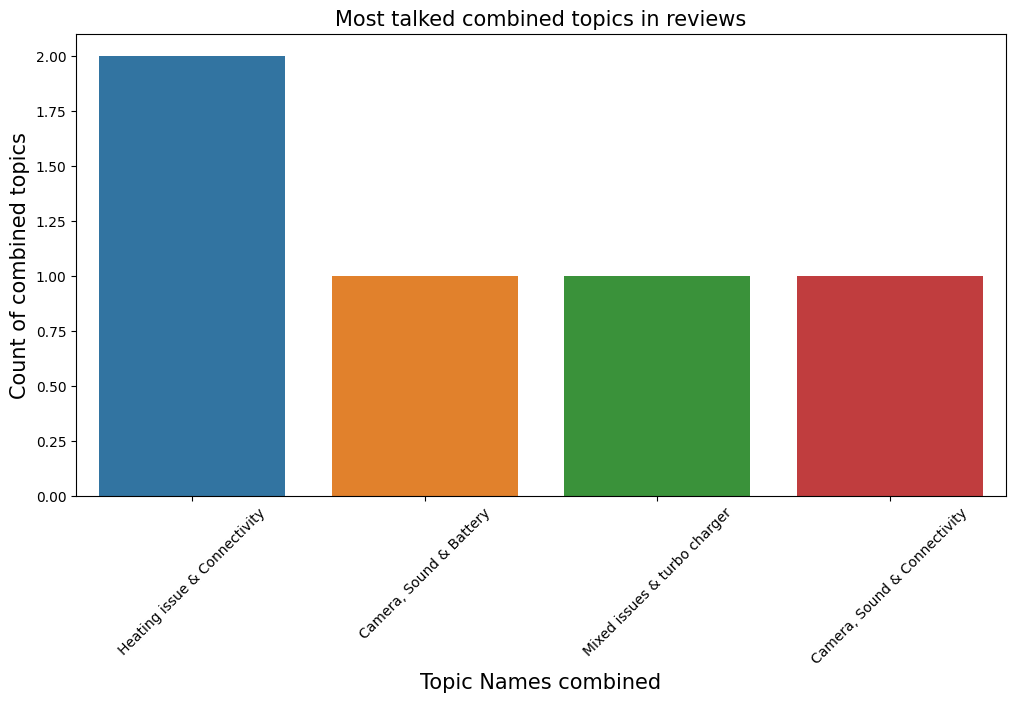

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Extracting reviews of 5 topic(review of battery)
review_data.loc[review_data.Topic_Number.str.contains('3'),['review','Topic_Name']].head(2)

,review,Topic_Name
5,"Phone is awesome. But while charging, it heats...",turbo charger
7,It's over hitting problems...and phone hanging...,turbo charger


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, Image
from textblob import TextBlob

# Create header button, text input, and output widgets
header = widgets.HTML(value='<h1>Product Reviews Topic Modelling</h1>')
header1 = widgets.HTML(value='<h2>"Unlock the hidden insights within product reviews with the power of Topic Modelling."</h2>')
gif_url = "https://i.pinimg.com/originals/7b/2a/e3/7b2ae340a63e1036482ed1839b1460d1.gif"

subheader = widgets.HTML(value='<h3>Please select product number:</h3>')
button = widgets.Button(description='Enter')
text_input = widgets.Text(placeholder='Enter a string')
output = widgets.Output()

# Function called when button is clicked
def on_button_click(button):
    # Retrieve the value from the text input
    #input_string=4
    input_string = text_input.value
    review_data1=review_data.loc[review_data.Topic_Number.str.contains(str(input_string)),['review','Topic_Name']]
    review_data1['Sentiment'] = review_data1['review'].apply(lambda x: TextBlob(x).sentiment)
    review_data1['Polarity'] = review_data1['Sentiment'].apply(lambda x: x.polarity)
    review_data1['Sentiment_Label'] = review_data1['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
    df=review_data1[['review','Topic_Name','Sentiment_Label']].head(10)

    # Display the dataframe in the output widget
    with output:
        output.clear_output()
        display(df)

# Attach function to button's on_click event
button.on_click(on_button_click)

#display(Image(url=gif_url))

# Display button, text input, and output widgets
display(header,header1, Image(url=gif_url),subheader, text_input, button, output)


HTML(value='<h1>Product Reviews Topic Modelling</h1>')

HTML(value='<h2>"Unlock the hidden insights within product reviews with the power of Topic Modelling."</h2>')

HTML(value='<h3>Please select product number:</h3>')

Text(value='', placeholder='Enter a string')

Button(description='Enter', style=ButtonStyle())

Output()